In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# https://www.kaggle.com/code/gabenazario/wine-quality-classification-rdm-forest-keras

#data = pd.read_csv("~/datacsv/Churn_Modelling.csv")
df_red = pd.read_csv("~/datacsv/winequality-red.csv", sep=',')   #red wine UCI dataset
df_white = pd.read_csv("~/datacsv/winequality-white.csv", sep=';')   #red wine UCI dataset

In [3]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
df_red.shape

(1599, 12)

In [6]:
df_white.shape

(4898, 12)

In [7]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

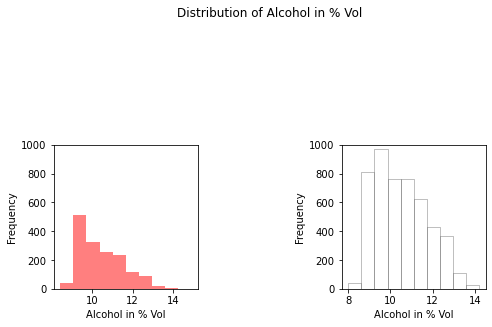

In [11]:
# Create Histogram
fig, ax = plt.subplots(1, 2)
 
ax[0].hist(df_red.alcohol, 10, facecolor ='red',alpha = 0.5, label ="Red wine")
 
ax[1].hist(df_white.alcohol, 10, facecolor ='white',ec ="black", lw = 0.5, alpha = 0.5,label ="White wine")
 
fig.subplots_adjust(left = 0, right = 1, bottom = 0,top = 0.5, hspace = 0.05, wspace = 1)
 
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
 
fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()

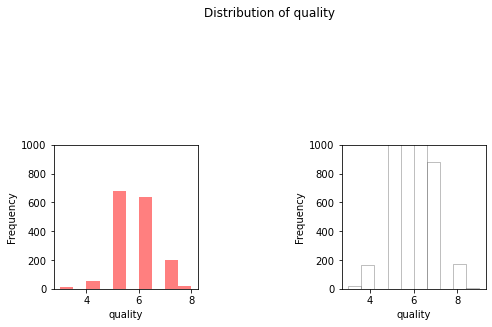

In [38]:
# Create Histogram
fig, ax = plt.subplots(1, 2)
 
ax[0].hist(df_red.quality, 10, facecolor ='red',alpha = 0.5, label ="Red wine")
 
ax[1].hist(df_white.quality, 10, facecolor ='white',ec ="black", lw = 0.5, alpha = 0.5,label ="White wine")
 
fig.subplots_adjust(left = 0, right = 1, bottom = 0,top = 0.5, hspace = 0.05, wspace = 1)
 
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("quality")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("quality")
ax[1].set_ylabel("Frequency")
 
fig.suptitle("Distribution of quality")
plt.show()

In [12]:
#data1=data.dropna()

In [13]:
x = df_white.iloc[:,0:11].values
y = df_white.iloc[:,11].values

In [14]:
x

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [15]:
y

array([6, 6, 6, ..., 6, 7, 6])

In [16]:
df_red.quality.unique()    #3,4,5,6,7,8.  - so there are 6 quality levels/labels

array([5, 6, 7, 4, 8, 3])

In [17]:
df_white.quality.unique()   # 3,4,5,6,7,8,9

array([6, 5, 7, 8, 4, 3, 9])

In [18]:
x.shape

(4898, 11)

In [19]:
# splitting the training & test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

In [20]:
x_train.shape ,x_test.shape, y_train.shape ,y_test.shape

((3918, 11), (980, 11), (3918,), (980,))

In [21]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
x_train1 = mc.fit_transform( x_train)
X_test1 = mc.fit_transform( x_test)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

from keras.callbacks import EarlyStopping

In [23]:
# Initialize the model
model=Sequential()

# Build input layer & Hidden layer
model.add(Dense(units=88, activation='relu', input_dim=11))
model.add(Dropout(rate=0.1))


In [24]:
# Building second layer
model.add(Dense(units=44,activation ='relu'))
model.add(Dropout(rate=0.1))

In [25]:
# Building 3rd layer
model.add(Dense(units=22,activation ='relu'))
model.add(Dropout(rate=0.1))

In [26]:
# Building 4th layer
model.add(Dense(units=11,activation ='relu'))
model.add(Dropout(rate=0.1))

In [27]:
#Adding outer layer
#model.add(Dense(units = 1, activation='sigmoid'))
model.add(Dense(units = 1, activation='relu'))

In [28]:
# compile the model
model.compile(optimizer='adam', loss='mae')   #Test accuracy: 0.590625  epochs=300
#model.compile(loss='mae', optimizer = 'adam', metrics=['accuracy'])

In [29]:
#Fit model:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_minitor = EarlyStopping(patience=200)

#train model:   Test accuracy: 0.4959   epochs=300
history = model.fit(x_train, y_train,
 epochs=600,
 batch_size=32,
 validation_split=0.2,
 callbacks=[early_stopping_minitor])

Epoch 1/600
98/98 [==============================] - 1s 2ms/step - loss: 2.5236 - val_loss: 1.5295
Epoch 2/600
98/98 [==============================] - 0s 1ms/step - loss: 1.8801 - val_loss: 1.2390
Epoch 3/600
98/98 [==============================] - 0s 1ms/step - loss: 1.6048 - val_loss: 1.3065
Epoch 4/600
98/98 [==============================] - 0s 1ms/step - loss: 1.4143 - val_loss: 1.0259
Epoch 5/600
98/98 [==============================] - 0s 1ms/step - loss: 1.3481 - val_loss: 1.0247
Epoch 6/600
98/98 [==============================] - 0s 1ms/step - loss: 1.3022 - val_loss: 0.8518
Epoch 7/600
98/98 [==============================] - 0s 1ms/step - loss: 1.2593 - val_loss: 1.1949
Epoch 8/600
98/98 [==============================] - 0s 1ms/step - loss: 1.2087 - val_loss: 1.3133
Epoch 9/600
98/98 [==============================] - 0s 1ms/step - loss: 1.2147 - val_loss: 1.0637
Epoch 10/600
98/98 [==============================] - 0s 1ms/step - loss: 1.2068 - val_loss: 0.7703
Epoch 11/

In [30]:
y_pred = model.predict(x_test)


31/31 [==============================] - 0s 580us/step


dict_keys(['loss', 'val_loss'])


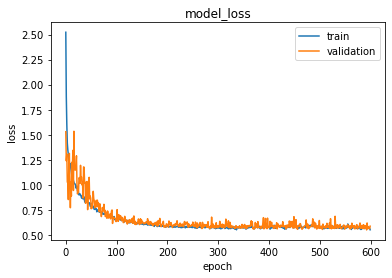

In [31]:
# Plot loss of train and test set
print(history.history.keys())

#Loss in train and test:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [32]:
#y_pred = y_pred.round()

In [33]:
#y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[6.02496195 7.        ]
 [5.92020416 5.        ]
 [5.00305939 5.        ]
 ...
 [5.00305939 5.        ]
 [5.88370323 6.        ]
 [5.00305939 4.        ]]


In [34]:
y_pred = y_pred.round()

In [35]:
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)


[[  0   0   4   4   0   0]
 [  0   0  31   5   0   0]
 [  0   0 215  82   0   0]
 [  0   0 125 289  10   0]
 [  0   0  13 140  22   0]
 [  0   0   7  31   2   0]]


In [36]:
accuracy_score(y_test, y_pred)

0.536734693877551

In [37]:
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.536734693877551
